In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
''' Metodo di Bisezione'''
def bisezione(a, b, f, tolx, xTrue):
  k = 100       # numero minimo di iterazioni per avere un errore minore di tolx
  vecErrore = np.zeros( (k,1) )
  
  if f(a)*f(b)>0:
    print('non esiste radice in [a,b]')
    return()
    
      
  for i in range(1,k):

    c = a+(b-a)/2 #più stabile
    vecErrore[i] = abs(c - xTrue)

    if abs(f(c)) < 1.e-16:       # se f(c) è molto vicino a 0 
        print('converge')
    else:
        if f(c) > 0:
            b = c
        else:
            a = c
  x = c  
      
  return (x, i, k, vecErrore)

In [11]:
# def bisezione(a, b, f, tolx, xTrue):

#     if f(a)*f(b) >0:
#         print('Non esiste radice in [a,b]')
#         return()
    
#     k= 100
#     vecErr= np.zeros(k)
#     i=0
#     while(b-a) > tolx + 1.e-16 * max(a,b):
#         # if (b-a < tolx+1.e-16*max(a,b)):
#         #     print('Errore: l\'intervallo è troppo piccolo ')
#         #     return ('Errore', i, k, vecErr)
#         i= i+1
#         c= a + (b - a) /2
#         vecErr[i-1] = abs(c - xTrue)
#         if abs(f(c)) < 1.e-15:
#             x= c
#             return(x, i, k, vecErr)
#         else:
#             if f(a) * f(c) < 0:
#                 b= c
#             else:
#                 a= c
#     x= c
#     return(x, i, k, vecErr)



In [15]:
''' Metodo di Newton'''

def newton( f, df, tolf, tolx, maxit, xTrue, x0=0):
  
  err=np.zeros(maxit, dtype=float)
  vecErrore=np.zeros( (maxit,1), dtype=float)
  
  
  i=0
  err[0]=tolx+1
  vecErrore[0] = np.abs(x0-xTrue)
  x=x0

  while (i<maxit and  abs(f(x))>tolf ): # scarto assoluto tra iterati (err[i]>tolx or
    x_new= f(x)
    err[i]=abs(x_new-x)
    vecErrore[i]=abs(x-xTrue)
    i=i+1
    x=x_new
    
  err=err[0:i]      
  vecErrore = vecErrore[0:i]
  return (x, i, err, vecErrore)  

In [4]:
'''creazione del problema'''
f = lambda x: np.exp(x)-x**2
df = lambda x: np.exp(x)-2*x
xTrue = -0.7034674
fTrue = f(xTrue)
print (fTrue)

a=-1.0
b=1.0
tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0= 0

4.278746923436216e-08


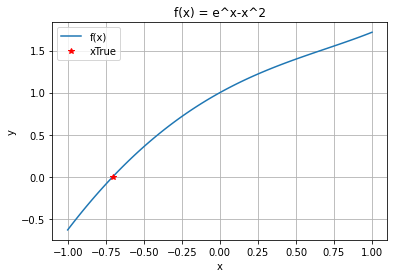

In [5]:
''' Grafico funzione in [a, b]'''
x_plot = np.linspace(a, b, 101)
f_plot = f(x_plot)

plt.plot(x_plot, f_plot)
plt.plot(xTrue, f(xTrue), '*', color='red')
plt.legend(("f(x)","xTrue"))
plt.xlabel("x")
plt.ylabel("y")
plt.title("f(x) = e^x-x^2")
plt.grid()

In [18]:
''' Calcolo soluzione tramite Bisezione e Newton'''
(xBise, iter_bise, err, vecErr_bise) = bisezione(a,b,f,tolx,xTrue)
print('Metodo di bisezione \n x =', xBise,'\n iter_bise=',iter_bise  ,'\n iter_max=', maxit)
print('\n')


(xNew, iter_new, err, vecErr_new) = newton(f, df, 1.e-16, 1.e-6, maxit, fTrue,x0)
print('Metodo di Newton \n x =', xNew,'\n iter_new=', iter_new, '\n err_new=', vecErr_new)
print('\n')

converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
Metodo di bisezione 
 x = -0.7034674224983917 
 iter_bise= 99 
 iter_max= 100


Metodo di Newton 
 x = inf 
 iter_new= 6 
 err_new= [[4.27874692e-08]
 [9.99999957e-01]
 [1.71828179e+00]
 [2.62244904e+00]
 [6.89216550e+00]
 [9.37029210e+02]]




C:\Users\sharo\AppData\Local\Temp\ipykernel_25436\2992932332.py:2: RuntimeWarning: overflow encountered in exp
  f = lambda x: np.exp(x)-x**2
C:\Users\sharo\AppData\Local\Temp\ipykernel_25436\2992932332.py:2: RuntimeWarning: invalid value encountered in double_scalars
  f = lambda x: np.exp(x)-x**2


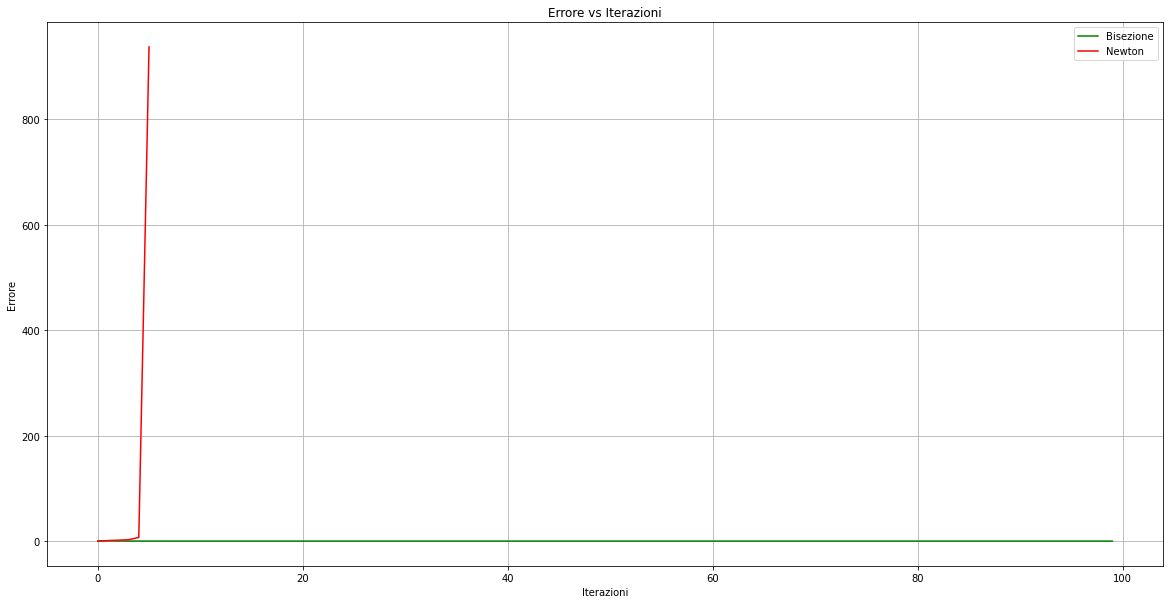

In [20]:
''' Grafico Errore vs Iterazioni'''
plt.figure(figsize=(20,10))
plt.plot(vecErr_bise, color='green', label='Bisezione')
plt.plot(vecErr_new, color='red', label='Newton')
plt.legend()
plt.xlabel('Iterazioni')
plt.ylabel('Errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()